# A step-by-step complete beginner’s guide to building your first Neural Network in a couple lines of code using KERAS

# Deep Learning pipeline :
    
* Exploring and Processing the Data

* Building and Training our Neural Network

* Visualizing Loss and Accuracy

* Adding Regularization to our Neural Network

#### Data Set : Zillow’s Home Value Prediction Kaggle competition data.(Kaggle)

#### Input features in the first ten columns:

* Lot Area (in sq ft)

* Overall Quality (scale from 1 to 10)

* Overall Condition (scale from 1 to 10)

* Total Basement Area (in sq ft)

* Number of Full Bathrooms

* Number of Half Bathrooms

* Number of Bedrooms above ground

* Total Number of Rooms above ground

* Number of Fireplaces

* Garage Area (in sq ft)

#### The feature that we would like to predict:

Is the house price above the median or not? (1 for yes and 0 for no)

# Exploring and Processing the Data

# Read the input data

In [11]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


# Split our dataset into the input features (which we call x) and the label (which we call y).

In [3]:
x = df.drop('AboveMedianPrice',axis=1).values
y = df['AboveMedianPrice'].values

In [7]:
print(' number of Features  \t :',x.shape[1],'\tnumber of training samples \t:',x.shape[0])
print(' number of Labels \t :',y.shape)

 number of Features  	 : 10 	number of training samples 	: 1460
 number of Labels 	 : (1460,)


# Scale the data (Normalization) so that the input features have similar orders of magnitude.

The next step in our processing is to make sure that the scale of the input features are similar. Right now, features such as lot area are in the order of the thousands, a score for overall quality is ranged from 1 to 10, and the number of fireplaces tend to be 0, 1 or 2.

This makes it difficult for the initialization of the neural network, which causes some practical problems. One way to scale the data is to use an existing package from scikit-learn MinMaxScaler

#### The min-max scaler, which scales the dataset so that all the input features lie between 0 and 1 inclusive.

In [10]:
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

C:\Users\INTEL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Split our dataset into the training set, the validation set and the test set

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training Neural Network

The first thing we have to do is to set up the architecture. 

We need to decide on the kind of neural network architecture we want. 
Suppose we want this neural network:
The layers 

#### One  Input Layer 

#### Two Hidden Layers

Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation

#### Output Layer:
    
Output Layer: 1 neuron, Sigmoid activation
    
Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.

In [29]:
from keras.models import Sequential
from keras.layers import Dense

# Build Keras Model

* This says that we will store our model in the variable ‘model’

* We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 10 since we have 10 input features. 
  #### Note that ‘Dense’ refers to a fully-connected layer.
    
* second layer is also a dense layer with 32 neurons, ReLU activation. 
  #### Note that we do not have to describe the input shape since Keras can infer from the output of our first layer
    
* Our third layer is a dense layer with 1 neuron, sigmoid activation.

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)), #### input shape is 10 since we have 10 features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),#### the output layer 
])

Instructions for updating:
Colocations handled automatically by placer.


#### Configure the model 

* Telling it which algorithm you want to use to do the optimization

* Telling it what loss function to use

* Telling it what other metrics you want to track apart from the loss function

Configuring the model with these settings requires us to call the function model.compile

* optimizer='sgd' ==>‘sgd’ refers to stochastic gradient descent

* loss='binary_crossentropy' ==> The loss function for outputs that take the values 1 or 0 is called binary cross entropy.



In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training on the data

In [17]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.6890 - acc: 0.5088 - val_loss: 0.6861 - val_acc: 0.5068
Epoch 2/100
1022/1022 [==============================] - 0s 66us/step - loss: 0.6809 - acc: 0.5098 - val_loss: 0.6790 - val_acc: 0.5068
Epoch 3/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.6747 - acc: 0.5108 - val_loss: 0.6733 - val_acc: 0.5114
Epoch 4/100
1022/1022 [==============================] - 0s 78us/step - loss: 0.6696 - acc: 0.5127 - val_loss: 0.6683 - val_acc: 0.5114
Epoch 5/100
1022/1022 [==============================] - 0s 74us/step - loss: 0.6647 - acc: 0.5166 - val_loss: 0.6635 - val_acc: 0.5114
Epoch 6/100
1022/1022 [==============================] - 0s 78us/step - loss: 0.6599 - acc: 0.5186 - val_loss: 0.6588 - val_acc: 0.5297
Epoch 7/100
1022/1022 [==============================] - 0s 72us/step - loss: 0.6552 - acc

1022/1022 [==============================] - 0s 54us/step - loss: 0.3434 - acc: 0.8738 - val_loss: 0.3418 - val_acc: 0.8813
Epoch 59/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.3405 - acc: 0.8777 - val_loss: 0.3380 - val_acc: 0.8813
Epoch 60/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.3378 - acc: 0.8748 - val_loss: 0.3349 - val_acc: 0.8813
Epoch 61/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.3353 - acc: 0.8757 - val_loss: 0.3317 - val_acc: 0.8858
Epoch 62/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.3326 - acc: 0.8787 - val_loss: 0.3287 - val_acc: 0.8904
Epoch 63/100
1022/1022 [==============================] - ETA: 0s - loss: 0.7411 - acc: 0.718 - 0s 50us/step - loss: 0.3299 - acc: 0.8777 - val_loss: 0.3261 - val_acc: 0.8904
Epoch 64/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.3278 - acc: 0.8777 - val_loss: 0.3237 - val_acc: 0.8858
Epoch 65/100
102

# Evaluate the Model

In [18]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 66us/step


0.8538812801718167

# Visualizing Loss and Accuracy

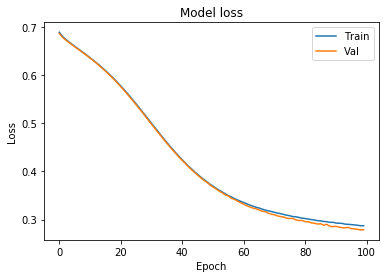

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot the loss and the val_loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#the title of this graph
plt.title('Model loss')
# labels for x axis and y axis
plt.ylabel('Loss')
plt.xlabel('Epoch')
#legend for our graph, and the location of the legend will be in the upper right
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot training accuracy and validation accuracy :

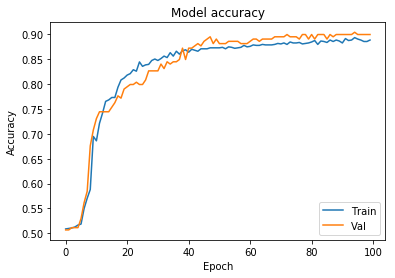

In [20]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Since the improvements in our model to the training set looks somewhat matched up with improvements to the validation set, it doesn’t seem like overfitting is a huge problem in the  model.

# Adding Regularization to our Neural Network

For the sake of introducing regularization to our neural network, let’s formulate with a neural network that will badly overfit on our training set. 

In [21]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4818 - acc: 0.7505 - val_loss: 0.3735 - val_acc: 0.8356
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3438 - acc: 0.8640 - val_loss: 0.3041 - val_acc: 0.8813
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3056 - acc: 0.8796 - val_loss: 0.3790 - val_acc: 0.8265
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3270 - acc: 0.8728 - val_loss: 0.3018 - val_acc: 0.8858
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2763 - acc: 0.8933 - val_loss: 0.2687 - val_acc: 0.8813
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2679 - acc: 0.8885 - val_loss: 0.4026 - val_acc: 0.8493
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2575 - acc: 0.8924 - val_loss: 0.2759 - val_acc: 0.8721
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1475 - acc: 0.9423 - val_loss: 0.3863 - val_acc: 0.8858s - loss: 0.1463 - acc: 0.94
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1500 - acc: 0.9472 - val_loss: 0.4747 - val_acc: 0.8721
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1430 - acc: 0.9462 - val_loss: 0.5149 - val_acc: 0.8493
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1368 - acc: 0.9462 - val_loss: 0.4898 - val_acc: 0.8813
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1457 - acc: 0.9384 - val_loss: 0.3913 - val_acc: 0.8676
Epoch 66/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1298 - acc: 0.9481 - val_loss: 0.4087 - val_acc: 0.8950
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1384 - acc: 0.9423 - val_loss: 0.4118 - val_acc: 0.8813
Epoch 68/100
1022/10

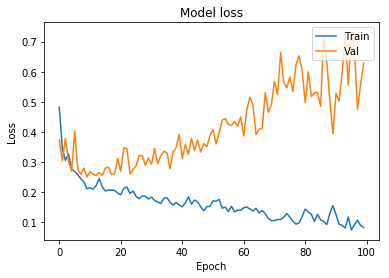

In [22]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Note
The training loss is decreasing, but the validation loss is way above the training loss and increasing,hence overfitting scenario confirmed.

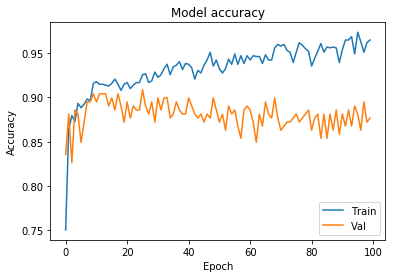

In [23]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

We can see a clearer divergence between train and validation accuracy as well

#### Strategies to reduce over-fitting 

(Apart from changing our architecture back to our first model) incorporating  L2 regularization and dropout

In [24]:
from keras.layers import Dropout
from keras import regularizers

In [35]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(rate =0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(rate=0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(rate=0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(rate=0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

#### Dropout --> This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training

Compile the model

In [36]:
model_3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Train the model

In [37]:
hist_3 = model.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_val,Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 552us/step - loss: 0.2856 - acc: 0.8855 - val_loss: 0.2761 - val_acc: 0.8858
Epoch 2/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.2860 - acc: 0.8894 - val_loss: 0.2764 - val_acc: 0.8995
Epoch 3/100
1022/1022 [==============================] - 0s 73us/step - loss: 0.2848 - acc: 0.8924 - val_loss: 0.2751 - val_acc: 0.8995
Epoch 4/100
1022/1022 [==============================] - 0s 75us/step - loss: 0.2840 - acc: 0.8865 - val_loss: 0.2771 - val_acc: 0.9041
Epoch 5/100
1022/1022 [==============================] - 0s 63us/step - loss: 0.2839 - acc: 0.8894 - val_loss: 0.2749 - val_acc: 0.8995
Epoch 6/100
1022/1022 [==============================] - 0s 54us/step - loss: 0.2836 - acc: 0.8885 - val_loss: 0.2750 - val_acc: 0.9041
Epoch 7/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.2829 - acc: 0.8885 - val_loss: 0.2729 - val_acc: 0.8995


1022/1022 [==============================] - 0s 67us/step - loss: 0.2644 - acc: 0.8933 - val_loss: 0.2514 - val_acc: 0.9041
Epoch 61/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.2630 - acc: 0.8894 - val_loss: 0.2570 - val_acc: 0.8995
Epoch 62/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.2641 - acc: 0.8914 - val_loss: 0.2505 - val_acc: 0.9041
Epoch 63/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.2638 - acc: 0.8914 - val_loss: 0.2501 - val_acc: 0.9087
Epoch 64/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.2634 - acc: 0.8924 - val_loss: 0.2511 - val_acc: 0.8995
Epoch 65/100
1022/1022 [==============================] - 0s 66us/step - loss: 0.2628 - acc: 0.8904 - val_loss: 0.2527 - val_acc: 0.8995
Epoch 66/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.2633 - acc: 0.8914 - val_loss: 0.2505 - val_acc: 0.8995
Epoch 67/100
1022/1022 [==============================

In [51]:
model.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.2565 - acc: 0.8992
Epoch 2/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.2572 - acc: 0.8982
Epoch 3/100
1022/1022 [==============================] - 0s 73us/step - loss: 0.2558 - acc: 0.8933
Epoch 4/100
1022/1022 [==============================] - 0s 86us/step - loss: 0.2563 - acc: 0.8943
Epoch 5/100
1022/1022 [==============================] - 0s 78us/step - loss: 0.2561 - acc: 0.8953
Epoch 6/100
1022/1022 [==============================] - 0s 59us/step - loss: 0.2559 - acc: 0.8973
Epoch 7/100
1022/1022 [==============================] - 0s 62us/step - loss: 0.2566 - acc: 0.8973
Epoch 8/100
1022/1022 [==============================] - 0s 68us/step - loss: 0.2558 - acc: 0.8982
Epoch 9/100
1022/1022 [==============================] - 0s 50us/step - loss: 0.2550 - acc: 0.8963
Epoch 10/100
1022/1022 [==============================] - 0s 77us/step - loss: 0.2557 - acc: 0.8982
Epoch 11/

1022/1022 [==============================] - 0s 67us/step - loss: 0.2467 - acc: 0.9022
Epoch 84/100
1022/1022 [==============================] - 0s 61us/step - loss: 0.2478 - acc: 0.9012
Epoch 85/100
1022/1022 [==============================] - 0s 63us/step - loss: 0.2474 - acc: 0.8982
Epoch 86/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.2480 - acc: 0.8953
Epoch 87/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.2477 - acc: 0.8982
Epoch 88/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.2465 - acc: 0.9031
Epoch 89/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.2471 - acc: 0.8982
Epoch 90/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.2459 - acc: 0.9012
Epoch 91/100
1022/1022 [==============================] - 0s 60us/step - loss: 0.2469 - acc: 0.9012
Epoch 92/100
1022/1022 [==============================] - 0s 59us/step - loss: 0.2468 - acc: 0.9012
Epoch 93/100


In [47]:
X_val.shape

(219, 10)

In [48]:
X_test.shape

(219, 10)

In [53]:
predictions = model.predict(X_test,batch_size=32, verbose=2)

In [64]:
Y_pred = []
for i in predictions:
    if i[0] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)

In [65]:
len(Y_pred)

219

In [67]:
import numpy as np
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred)*100)

87.21461187214612


In [68]:
df_pred = pd.DataFrame({'Actual_price':Y_test,'Predicted_Price':Y_pred})

In [69]:
df_pred.head()

,Actual_price,Predicted_Price
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1


the loss is a lot higher at the start, and that’s because we’ve changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

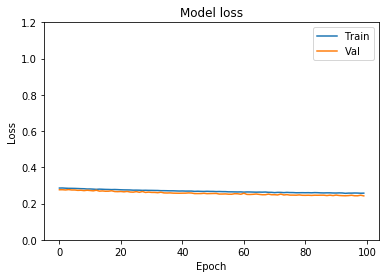

In [38]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

#### The validation loss much more closely matches our training loss.

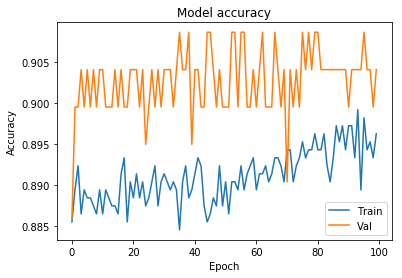

In [39]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

####  The validation accuracy has increased and overfitting has been avoided

# CONCLUSION

To deal with overfitting, we can code in the following strategies into our model each with about one line of code:

* L2 Regularization

* Dropout

If we visualize the training / validation loss and accuracy, we can see that these additions have helped deal with overfitting!